In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras import backend
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
data = pd.read_csv('/home/babybear68/data/BTC-USD.csv')
data = data[:-600]
data['Change'] = (data['Close'] - data['Open']) / data['Open']
WINDOW = 50
scaler = MinMaxScaler()
data['Change Scaled'] = scaler.fit_transform(data['Change'].values.reshape(-1, 1))
X = data['Change Scaled'].shift(1)
for i in range(2, WINDOW + 1):
        X = pd.concat([X, data['Change Scaled'].shift(i)], axis=1)

X = X[WINDOW:]
X = X.values.reshape((X.shape[0], WINDOW, 1))
y = data['Change Scaled'][WINDOW:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X[:-300]
X_test = X[-300:]
y_train = y[:-300]
y_test = y[-300:]

In [4]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(30))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.load_weights('/home/babybear68/model_5.h5')

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [6]:
y_pred = model.predict(X_test)
print('RMSE:', np.sqrt(np.mean((y_test - y_pred[:, 0]) ** 2)))
print('MAE:', np.mean(np.abs(y_test - y_pred[:, 0])))

RMSE: 0.010419755195350556
MAE: 0.00708999395986008


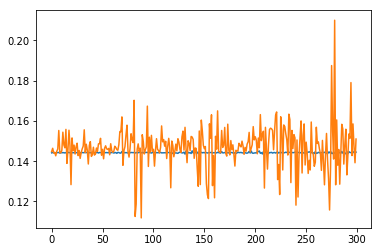

In [7]:
plt.plot(y_pred)
plt.plot(y_test.values)
plt.show()

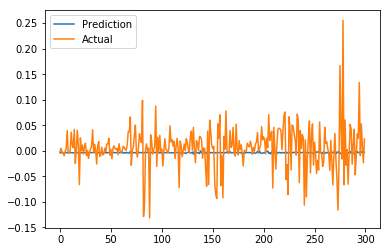

In [8]:
plt.plot(scaler.inverse_transform(y_pred), label='Prediction')
plt.plot(data['Change'][-300:].values, label='Actual')
plt.legend()
plt.show()

In [9]:
# (scaler.inverse_transform(y_pred), data['Change'][-300:].values)
print('RMSE:', np.sqrt(np.mean((scaler.inverse_transform(y_pred) - data['Change'][-300:].values) ** 2)))
print('MAE:', np.mean(np.abs(scaler.inverse_transform(y_pred) - data['Change'][-300:].values)))

RMSE: 0.041044547002750745
MAE: 0.027974259630117706
